#Data in this syntac is breast cancer dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import Imputer, StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Import Data

In [3]:
data = pd.read_csv("E:/Data Mining/data_breast_cancer2.csv")

In [3]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

            ...             radius_worst  texture_worst  perimeter_worst  \
0           ...                    25.38          17.33           184.60   
1           ...                    24.99          23.41           158.80   
2           ...                    23.57          25.53           152.50   
3           ...                    14.91          26.50            98.87   
4           ...                    22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 32 columns]

## EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [5]:
data['id']=data['id'].astype(object)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null object
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 no

In [7]:
data.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean           ...             \
count     569.000000              569.000000           ...              
mean        0.181162                0.062798           ...              
std         0.027414                0.007060           ...              
min         0.106000                0.049960           ...              
25%         0.161900                0.057700           ...              
50%         0.179200                0.061540           ...              
75%         0.195700                0.066120           ...              
max         0.304000                0.097440           ...              

       radius_worst  texture_worst  perimeter_worst   area_worst  \
count    569.000000     569.000000       569.000000   569.000000   
mean      16.269190      25.677223       107.261213   880.583128   
std        4.833242       6.146258        33.602542   569.356993   
min        7.930000      12.020000        50.410000   185.200000   
25%       13.010000      21.080000        84.110000   515.300000   
50%       14.970000      25.410000        97.660000   686.500000   
75%       18.790000      29.720000       125.400000  1084.000000   
max       36.040000      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 30 columns]

<function matplotlib.pyplot.show>

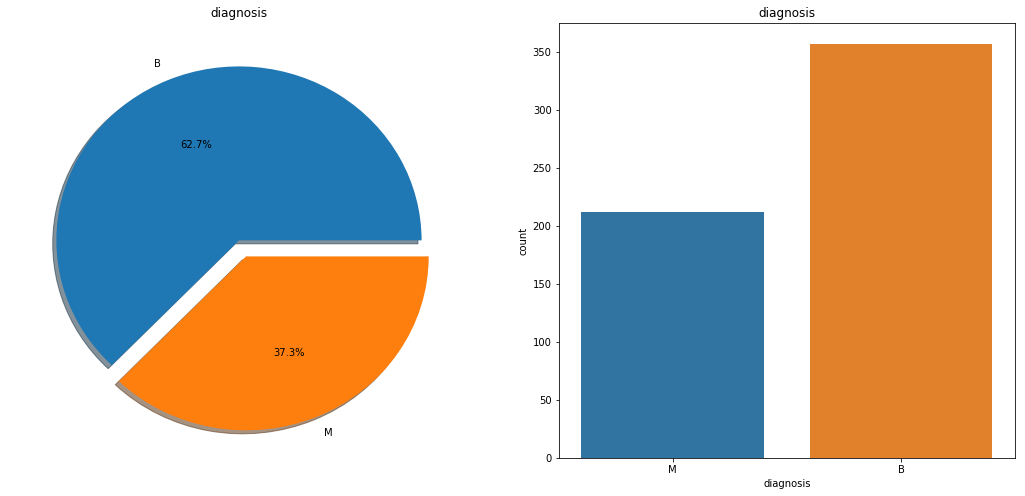

In [8]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data['diagnosis'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('diagnosis')
ax[0].set_ylabel('')
sns.countplot('diagnosis',data=data,ax=ax[1])
ax[1].set_title('diagnosis')
plt.show

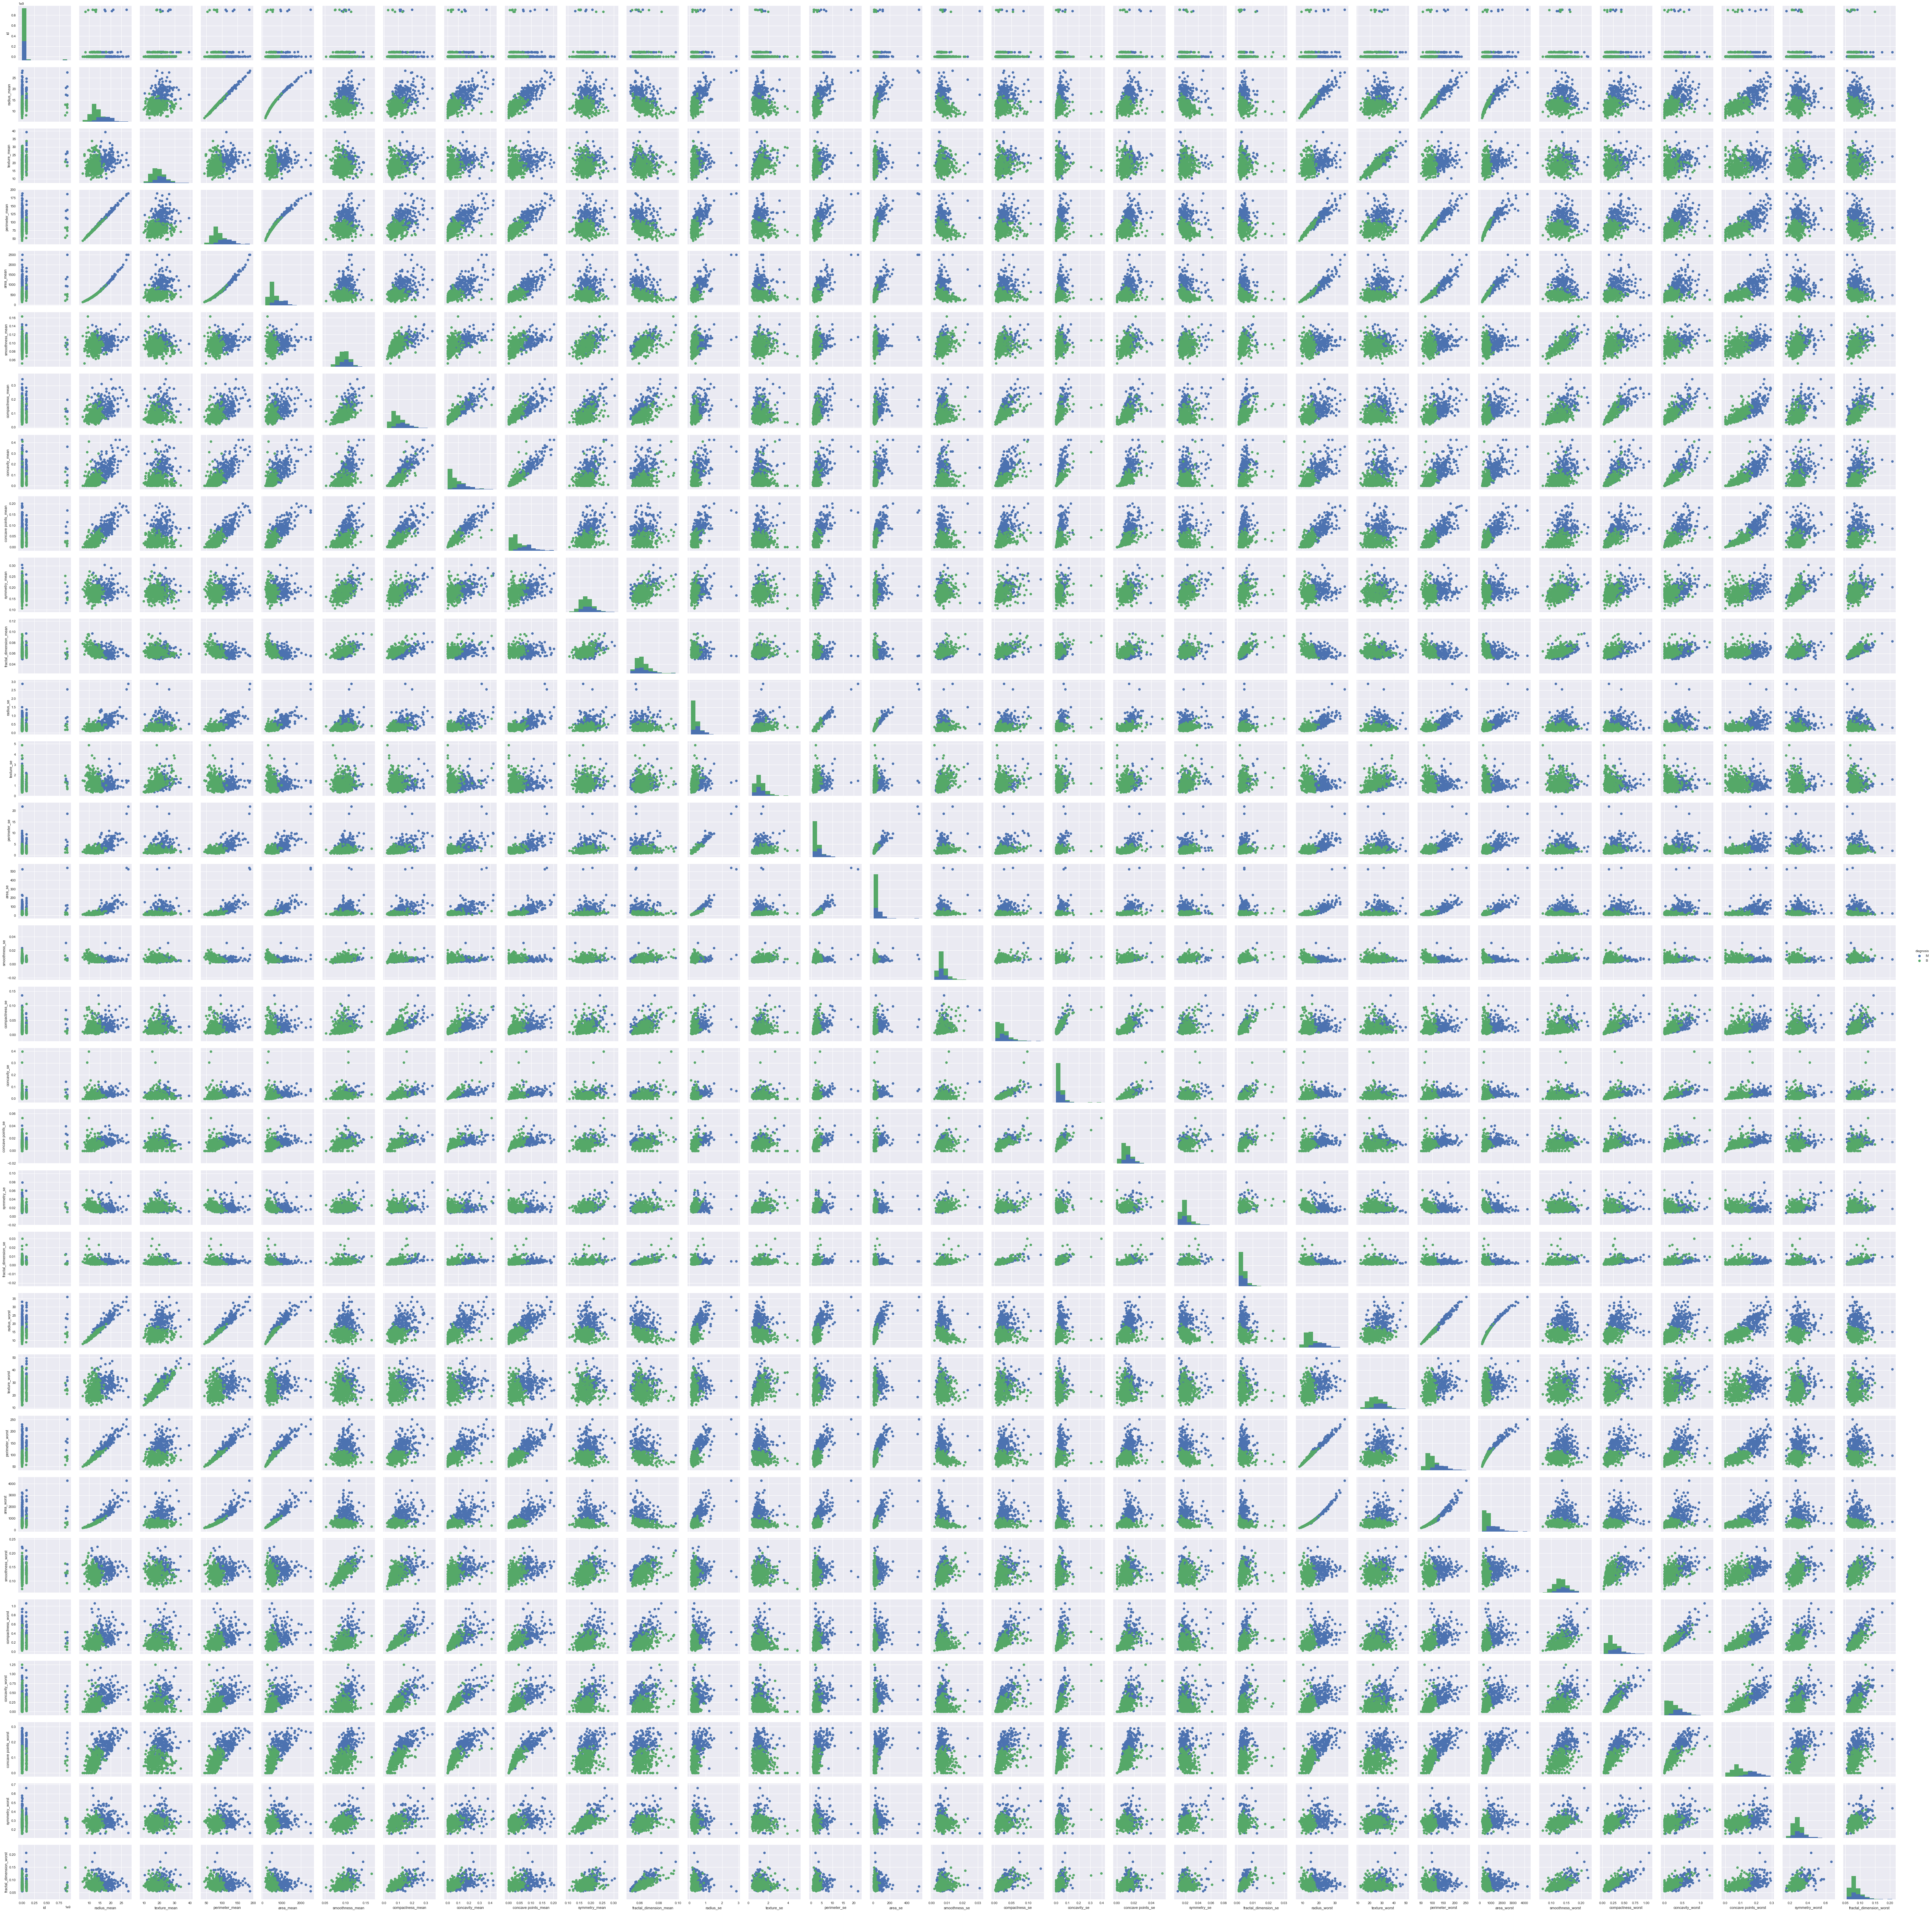

In [117]:
g = sns.PairGrid(data,hue="diagnosis")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()

In [9]:
cor = data.corr()
cor

radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.323782        0.997855   0.987357   
texture_mean                0.323782      1.000000        0.329533   0.321086   
perimeter_mean              0.997855      0.329533        1.000000   0.986507   
area_mean                   0.987357      0.321086        0.986507   1.000000   
smoothness_mean             0.170581     -0.023389        0.207278   0.177028   
compactness_mean            0.506124      0.236702        0.556936   0.498502   
concavity_mean              0.676764      0.302418        0.716136   0.685983   
concave points_mean         0.822529      0.293464        0.850977   0.823269   
symmetry_mean               0.147741      0.071401        0.183027   0.151293   
fractal_dimension_mean     -0.311631     -0.076437       -0.261477  -0.283110   
radius_se                   0.679090      0.275869        0.691765   0.732562   
texture_se                 -0.097317      0.386358       -0.086761  -0.066280   
perimeter_se                0.674172      0.281673        0.693135   0.726628   
area_se                     0.735864      0.259845        0.744983   0.800086   
smoothness_se              -0.222600      0.006614       -0.202694  -0.166777   
compactness_se              0.206000      0.191975        0.250744   0.212583   
concavity_se                0.194204      0.143293        0.228082   0.207660   
concave points_se           0.376169      0.163851        0.407217   0.372320   
symmetry_se                -0.104321      0.009127       -0.081629  -0.072497   
fractal_dimension_se       -0.042641      0.054458       -0.005523  -0.019887   
radius_worst                0.969539      0.352573        0.969476   0.962746   
texture_worst               0.297008      0.912045        0.303038   0.287489   
perimeter_worst             0.965137      0.358040        0.970387   0.959120   
area_worst                  0.941082      0.343546        0.941550   0.959213   
smoothness_worst            0.119616      0.077503        0.150549   0.123523   
compactness_worst           0.413463      0.277830        0.455774   0.390410   
concavity_worst             0.526911      0.301025        0.563879   0.512606   
concave points_worst        0.744214      0.295316        0.771241   0.722017   
symmetry_worst              0.163953      0.105008        0.189115   0.143570   
fractal_dimension_worst     0.007066      0.119205        0.051019   0.003738   

                         smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                     0.170581          0.506124        0.676764   
texture_mean                   -0.023389          0.236702        0.302418   
perimeter_mean                  0.207278          0.556936        0.716136   
area_mean                       0.177028          0.498502        0.685983   
smoothness_mean                 1.000000          0.659123        0.521984   
compactness_mean                0.659123          1.000000        0.883121   
concavity_mean                  0.521984          0.883121        1.000000   
concave points_mean             0.553695          0.831135        0.921391   
symmetry_mean                   0.557775          0.602641        0.500667   
fractal_dimension_mean          0.584792          0.565369        0.336783   
radius_se                       0.301467          0.497473        0.631925   
texture_se                      0.068406          0.046205        0.076218   
perimeter_se                    0.296092          0.548905        0.660391   
area_se                         0.246552          0.455653        0.617427   
smoothness_se                   0.332375          0.135299        0.098564   
compactness_se                  0.318943          0.738722        0.670279   
concavity_se                    0.248396          0.570517        0.691270   
concave points_se               0.380676          0.642262        0.683260   
symmetry_se                    

<function matplotlib.pyplot.show>

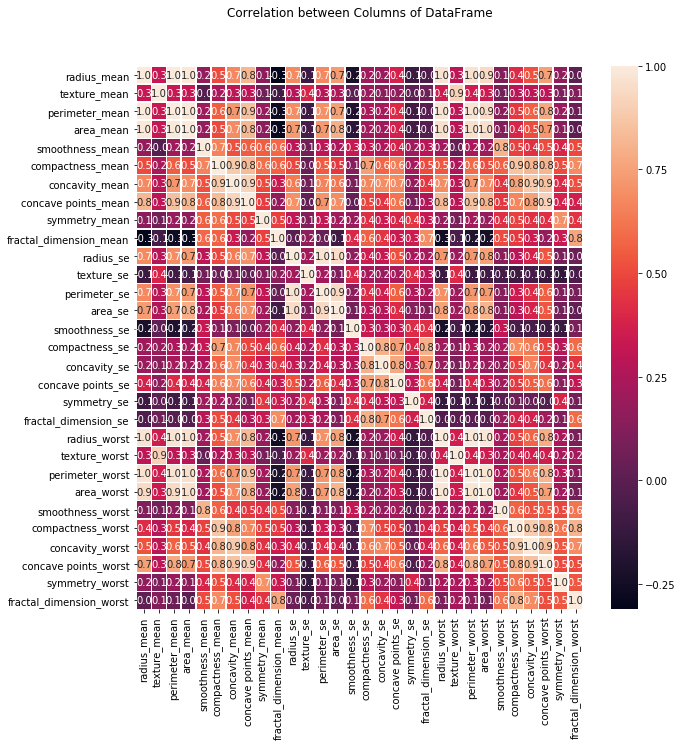

In [10]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(cor, annot=True, linewidths=.5, fmt='.1f', ax=ax)
plt.title("Correlation between Columns of DataFrame",y=1.08)
plt.show

In [11]:
a = data[data.columns[8:14]]
b = data[data.columns[14:20]]
c = data[data.columns[20:26]]
d = data[data.columns[26:32]]
u = data[data.columns[2:8]]

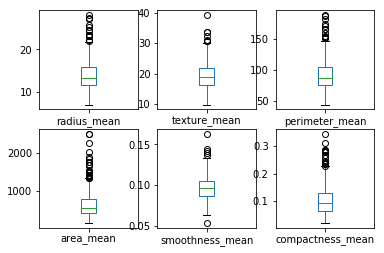

In [12]:
u.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False)
plt.show()

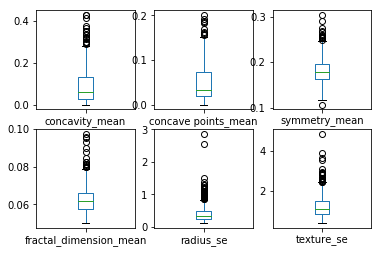

In [13]:
a.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False)
plt.show()

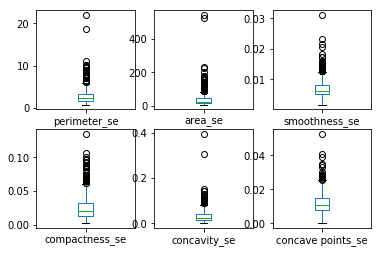

In [14]:
b.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False)
plt.show()

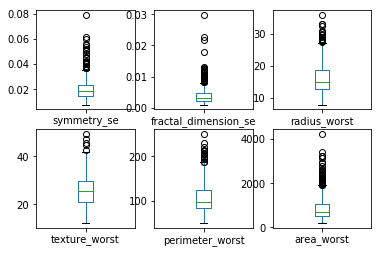

In [15]:
c.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False)
plt.show()

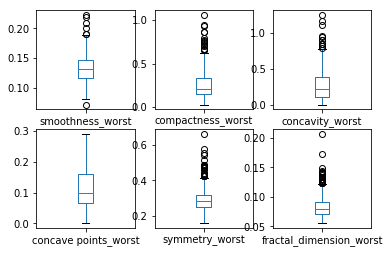

In [16]:
d.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False)
plt.show()

In [17]:
c = data.corr().abs()
s = c.unstack()
so = s.sort_values(kind='quicksort')
print(so[-50:-30])

perimeter_mean   radius_worst       0.969476
radius_worst     perimeter_mean     0.969476
                 radius_mean        0.969539
radius_mean      radius_worst       0.969539
perimeter_mean   perimeter_worst    0.970387
perimeter_worst  perimeter_mean     0.970387
perimeter_se     radius_se          0.972794
radius_se        perimeter_se       0.972794
area_worst       perimeter_worst    0.977578
perimeter_worst  area_worst         0.977578
area_worst       radius_worst       0.984015
radius_worst     area_worst         0.984015
perimeter_mean   area_mean          0.986507
area_mean        perimeter_mean     0.986507
                 radius_mean        0.987357
radius_mean      area_mean          0.987357
perimeter_worst  radius_worst       0.993708
radius_worst     perimeter_worst    0.993708
perimeter_mean   radius_mean        0.997855
radius_mean      perimeter_mean     0.997855
dtype: float64


## Preprocessing

In [18]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [4]:
X = data.drop(['diagnosis','id'],axis=1)

In [5]:
Y = LabelEncoder().fit_transform(data['diagnosis'])
Y = pd.DataFrame(Y, columns = ['diagnosis'])

## Feature Selection

In [33]:
model = ExtraTreesClassifier()
model.fit(X,Y)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [34]:
imp = pd.DataFrame({'importance':model.feature_importances_,'nama':X.columns})
imp.sort_values(by=['importance'],ascending=False)

importance                     nama
6     0.161687           concavity_mean
7     0.157971      concave points_mean
27    0.091589     concave points_worst
22    0.073991          perimeter_worst
20    0.070916             radius_worst
2     0.050519           perimeter_mean
0     0.049620              radius_mean
23    0.048774               area_worst
3     0.048704                area_mean
21    0.043098            texture_worst
1     0.029610             texture_mean
26    0.020234          concavity_worst
12    0.018463             perimeter_se
28    0.015024           symmetry_worst
8     0.012655            symmetry_mean
24    0.010403         smoothness_worst
4     0.009859          smoothness_mean
5     0.009635         compactness_mean
13    0.009263                  area_se
10    0.009224                radius_se
29    0.008823  fractal_dimension_worst
9     0.008780   fractal_dimension_mean
25    0.006949        compactness_worst
16    0.006597             concavity_se
17    0.006567        concave points_se
11    0.005098               texture_se
19    0.004659     fractal_dimension_se
18    0.004369              symmetry_se
15    0.004125           compactness_se
14    0.002794            smoothness_se

In [36]:
X_ft = X[['concave points_mean','concavity_mean','concave points_worst','perimeter_worst','radius_worst','radius_mean','area_worst','area_mean','perimeter_mean','texture_worst']]

## EDA Feature Selected

<function matplotlib.pyplot.show>

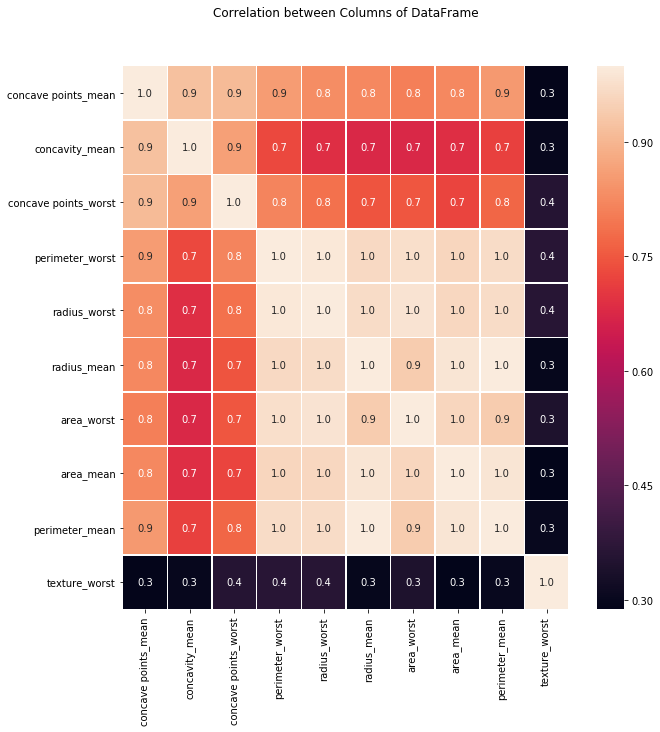

In [37]:
ft_cor = X_ft.corr()
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(ft_cor, annot=True, linewidths=.5, fmt='.1f', ax=ax)
plt.title("Correlation between Columns of DataFrame",y=1.08)
plt.show

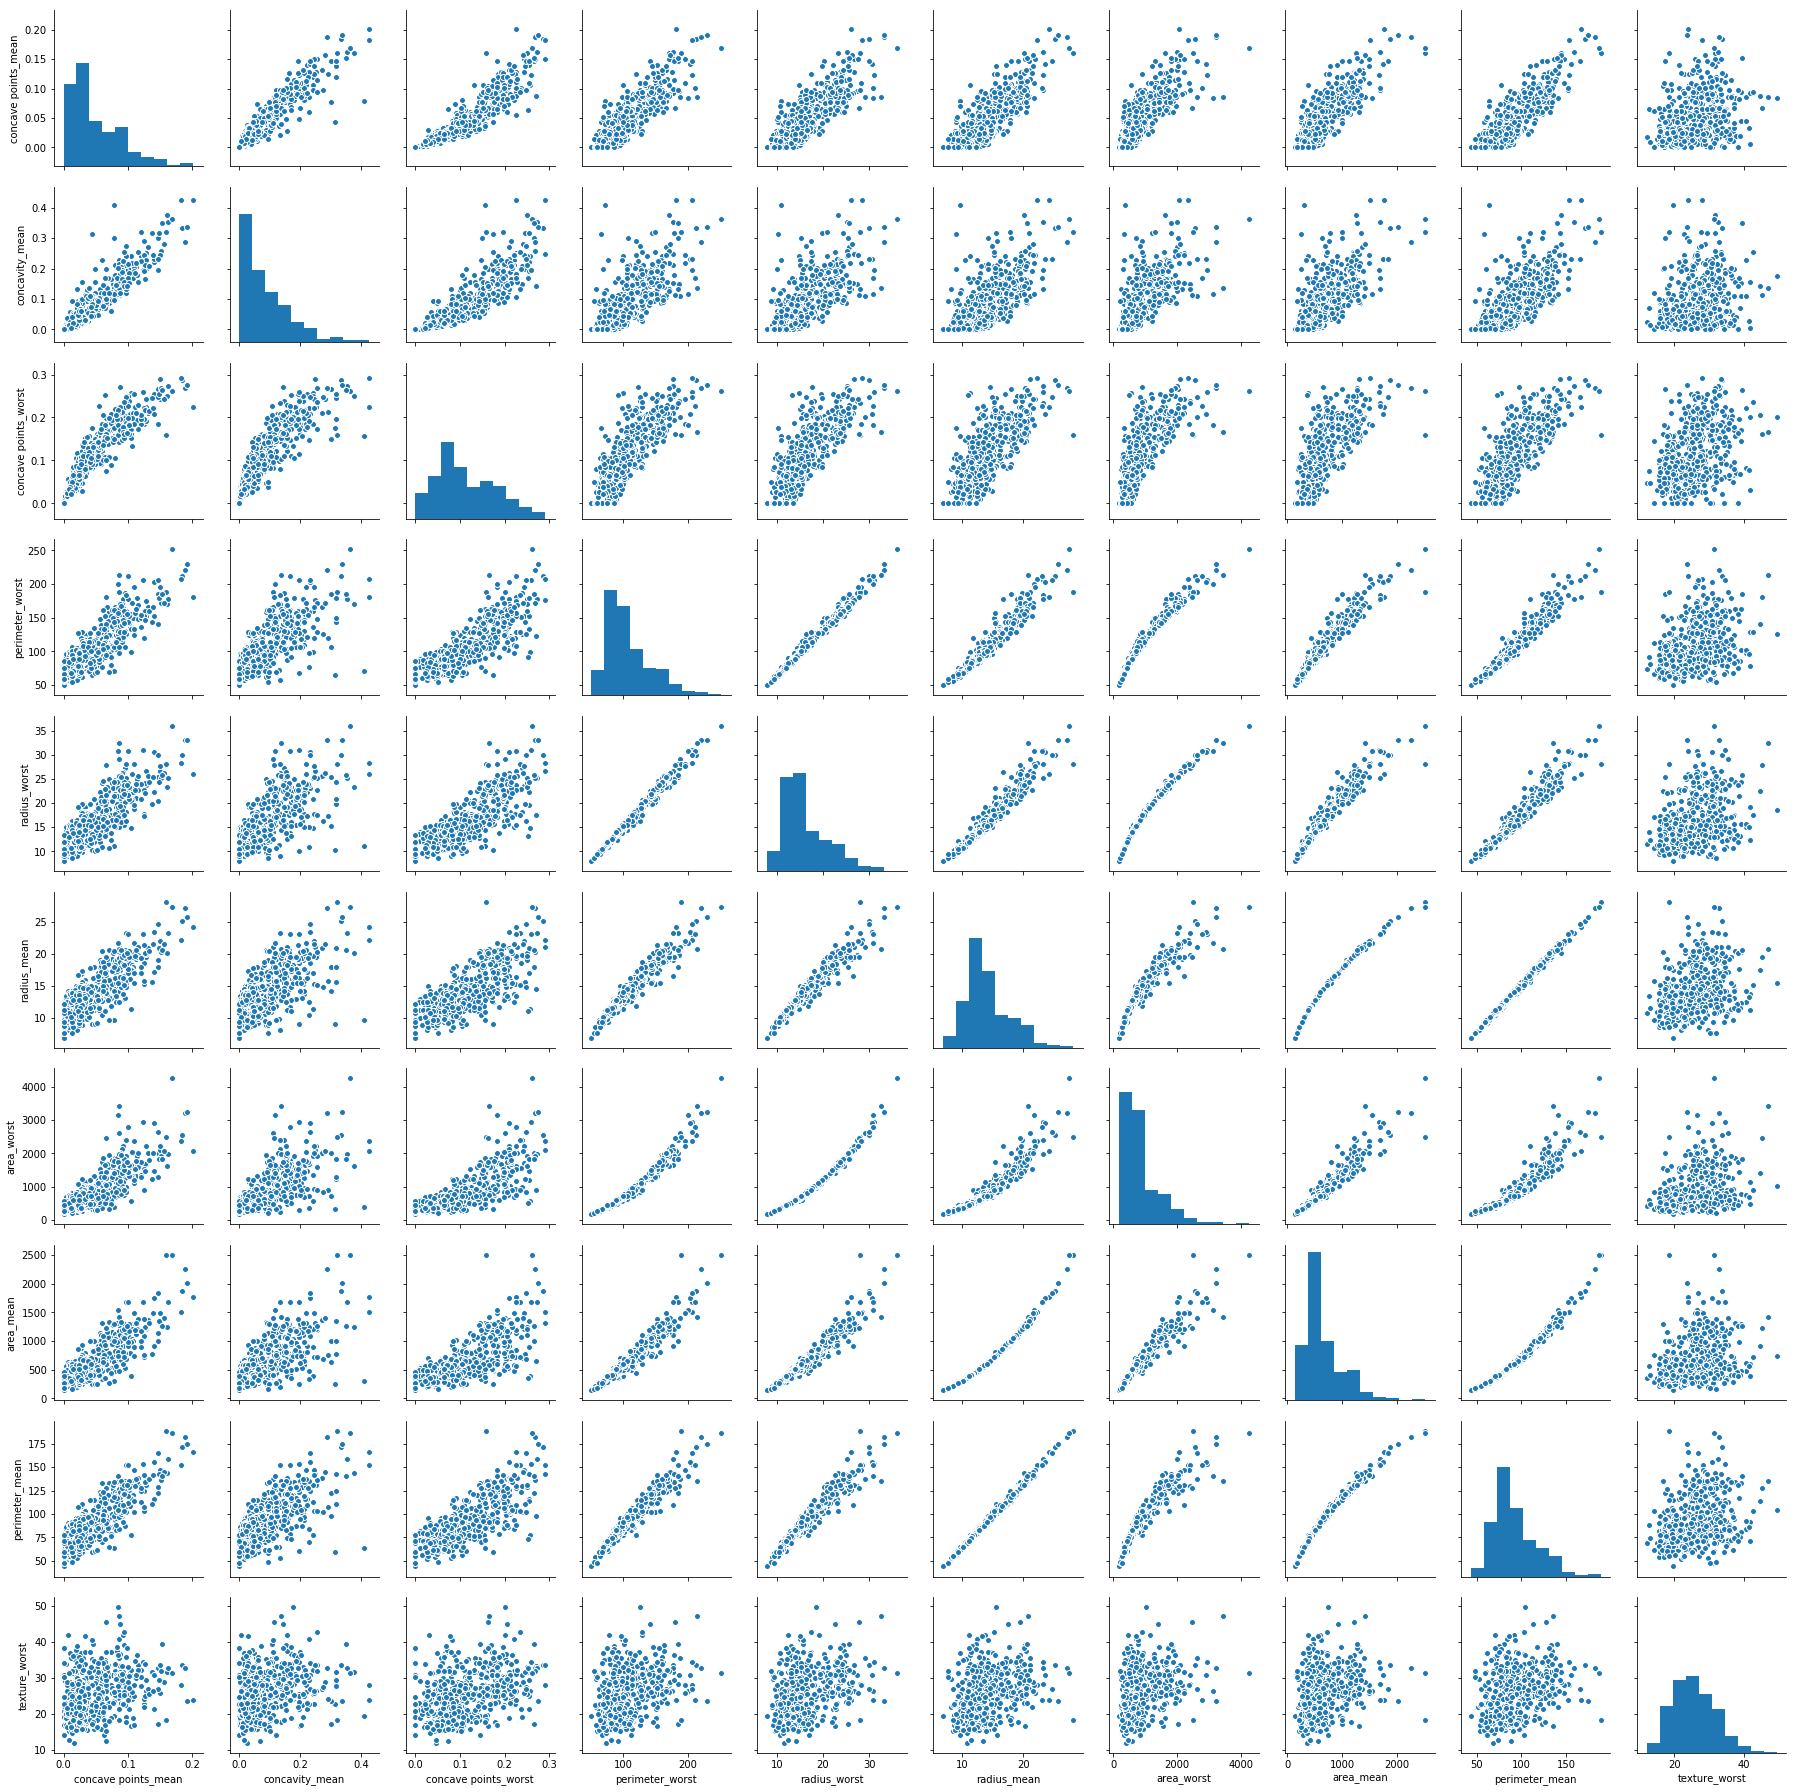

In [38]:
sns.pairplot(X_ft)

## Feature Part 2

In [6]:
X_ft2 = X[['concave points_mean','concavity_mean','concave points_worst','area_worst','texture_worst','texture_mean','concavity_worst','perimeter_se','symmetry_worst','symmetry_mean']]

<function matplotlib.pyplot.show>

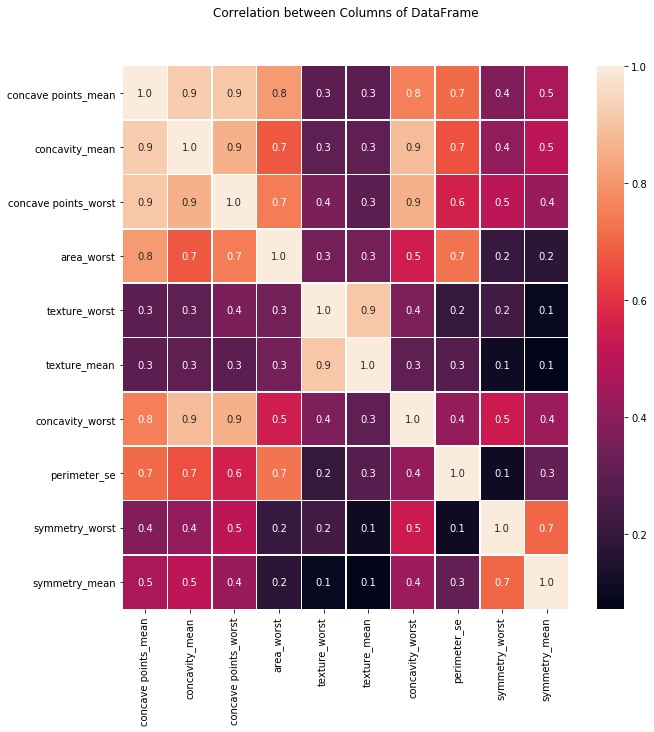

In [44]:
ft_cor2 = X_ft2.corr()
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(ft_cor2, annot=True, linewidths=.5, fmt='.1f', ax=ax)
plt.title("Correlation between Columns of DataFrame",y=1.08)
plt.show

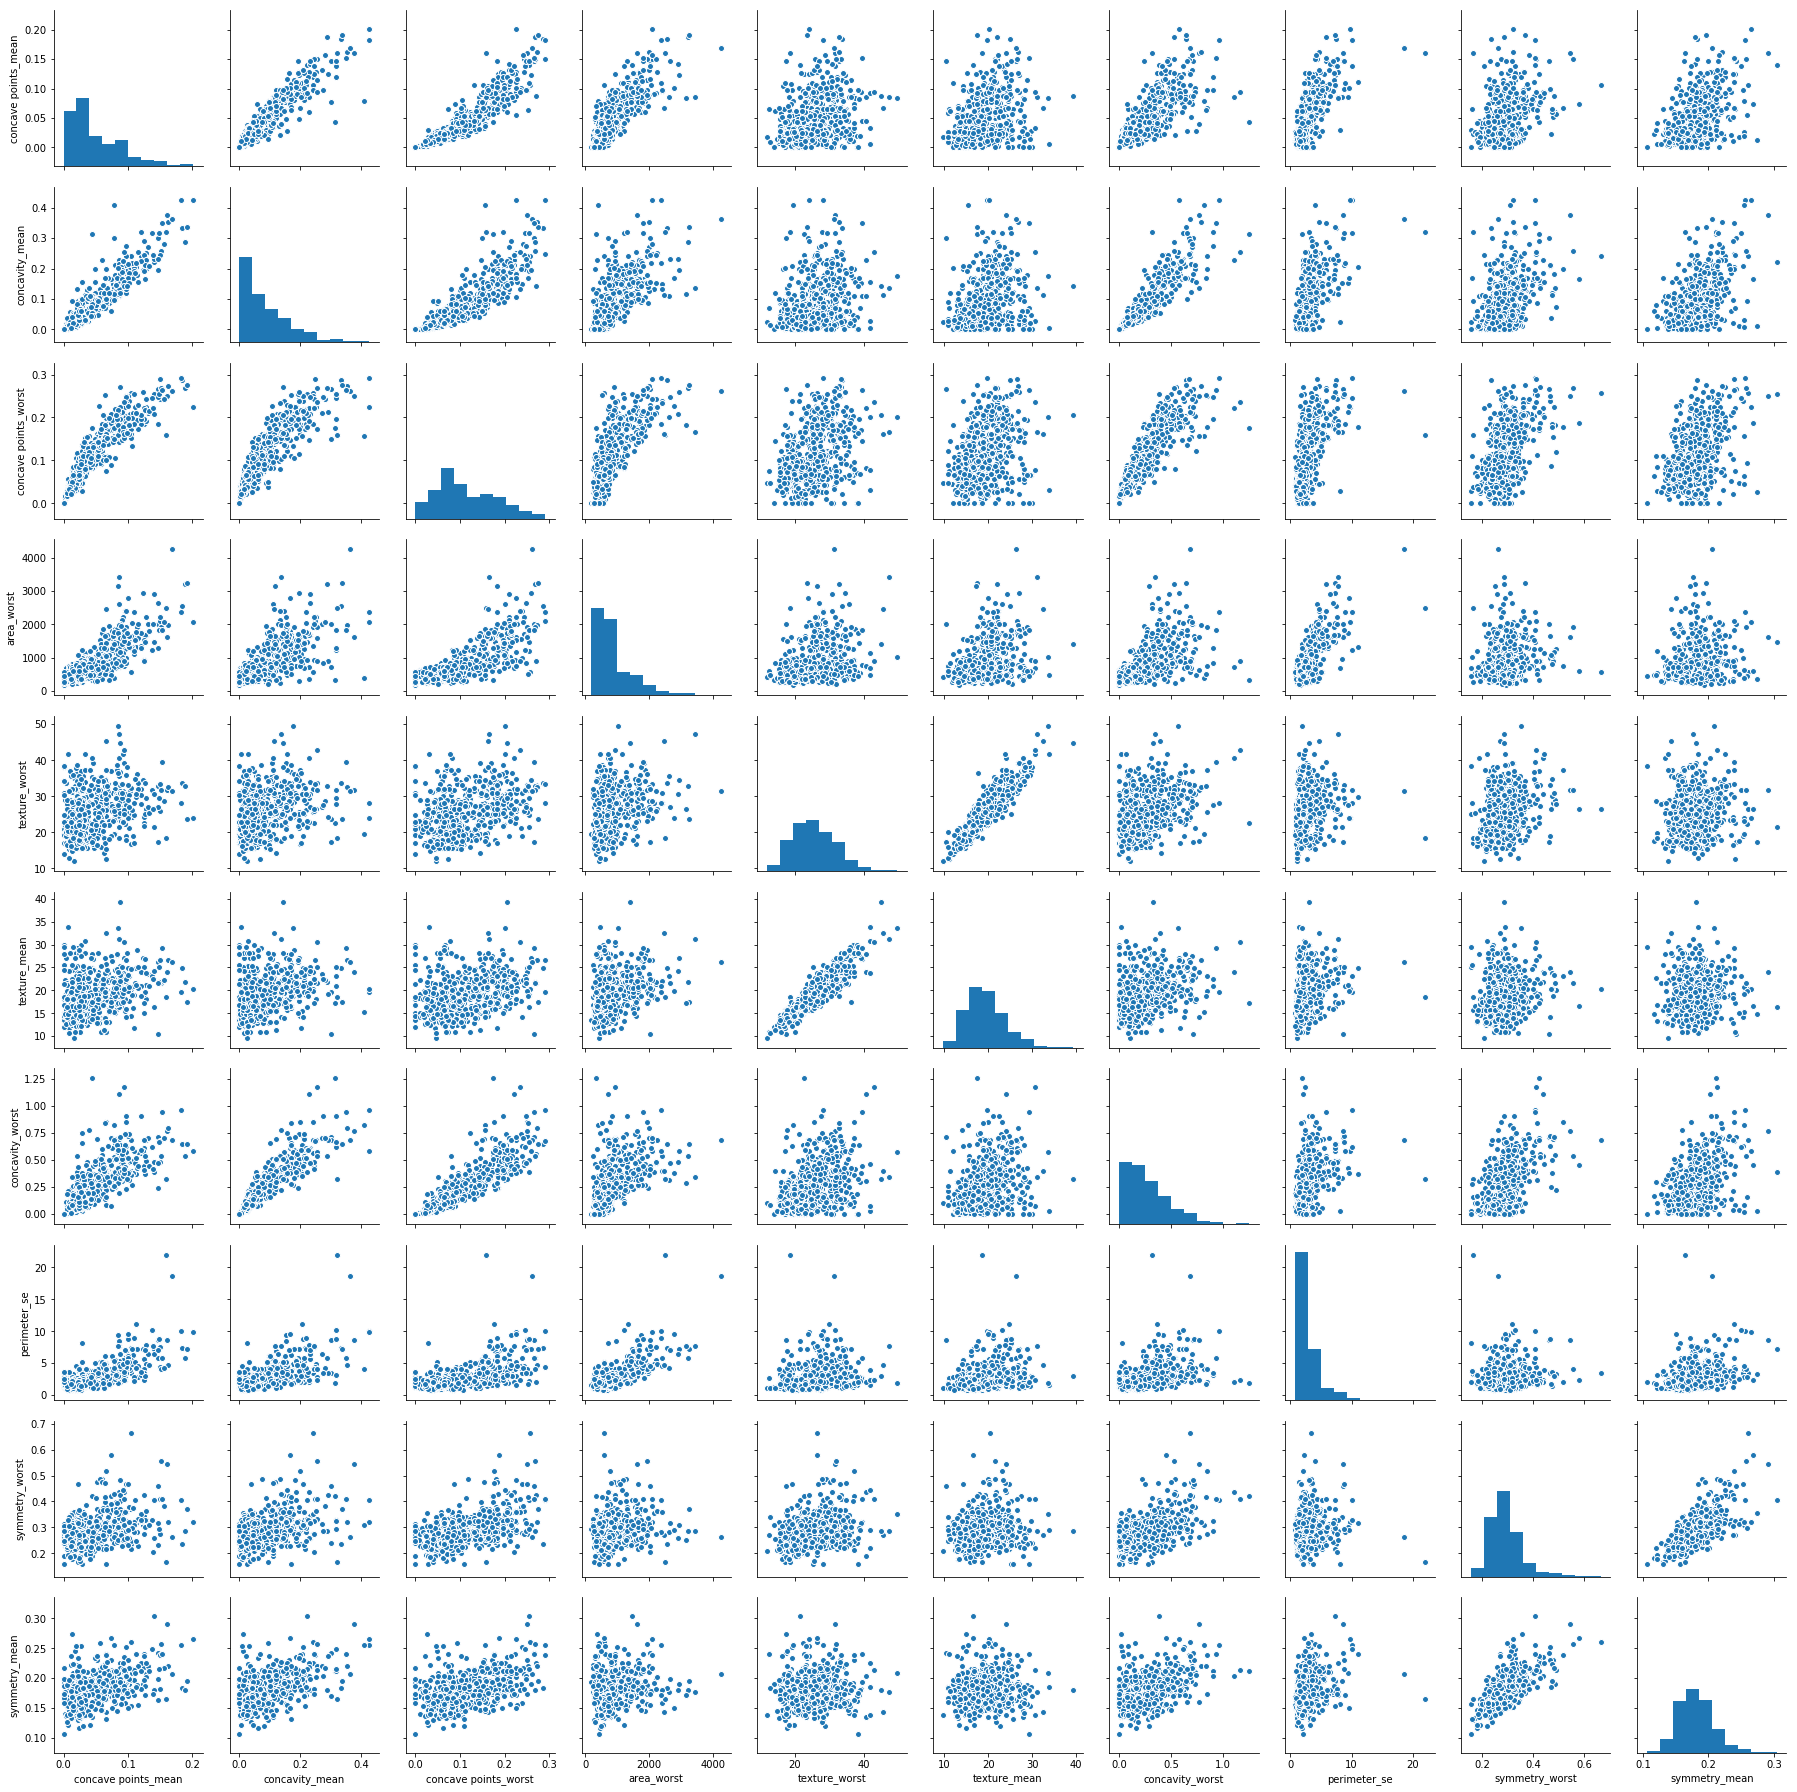

In [45]:
sns.pairplot(X_ft2)

## Classification

In [7]:
#using cross validation with k=5
cv=StratifiedKFold(n_splits=5,random_state=5)

In [8]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Discriminant Analysis', LinearDiscriminantAnalysis()))

results = []
names = []
tabel=[]
for name, model in models:
    akurasi = cross_val_score(model, X_ft2, Y, cv=cv, scoring='accuracy')
    presisi = cross_val_score(model, X_ft2, Y, cv=cv, scoring='precision')
    recalls = cross_val_score(model, X_ft2, Y, cv=cv, scoring='recall')
    auc_sc = cross_val_score(model, X_ft2, Y, cv=cv, scoring='roc_auc')
    results.append(akurasi)
    results.append(presisi)
    results.append(recalls)
    names.append(name)
    hasil1 = "%s: %f" % (name, akurasi.mean())
    hasil2 = "%s: %f" % (name, presisi.mean())
    hasil3 = "%s: %f" % (name, recalls.mean())
    hasil4 = "%s: %f" % (name, auc_sc.mean())
    tabel.append(['akurasi :',hasil1,'presisi :',hasil2,'recall :',hasil3,'auc :',hasil4])
tabel

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimato

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

[['akurasi :',
  'KNN: 0.903455',
  'presisi :',
  'KNN: 0.905469',
  'recall :',
  'KNN: 0.830786',
  'auc :',
  'KNN: 0.958966'],
 ['akurasi :',
  'Naive Bayes: 0.938638',
  'presisi :',
  'Naive Bayes: 0.936926',
  'recall :',
  'Naive Bayes: 0.896567',
  'auc :',
  'Naive Bayes: 0.985431'],
 ['akurasi :',
  'Random Forest: 0.956152',
  'presisi :',
  'Random Forest: 0.970482',
  'recall :',
  'Random Forest: 0.924585',
  'auc :',
  'Random Forest: 0.985977'],
 ['akurasi :',
  'Logistic Regression: 0.942085',
  'presisi :',
  'Logistic Regression: 0.965561',
  'recall :',
  'Logistic Regression: 0.877852',
  'auc :',
  'Logistic Regression: 0.986038'],
 ['akurasi :',
  'Discriminant Analysis: 0.949073',
  'presisi :',
  'Discriminant Analysis: 0.989595',
  'recall :',
  'Discriminant Analysis: 0.872647',
  'auc :',
  'Discriminant Analysis: 0.989591']]

## SVM

In [9]:
from sklearn import svm
random_state = np.random.RandomState(0)
scvlin = svm.SVC(kernel='linear', probability=True, random_state=random_state)
akurasi1 = cross_val_score(scvlin, X_ft2, Y, cv=cv, scoring='accuracy')
presisi1 = cross_val_score(scvlin, X_ft2, Y, cv=cv, scoring='precision')
recalls1 = cross_val_score(scvlin, X_ft2, Y, cv=cv, scoring='recall')
auc_sc1 = cross_val_score(model, X_ft2, Y, cv=cv, scoring='roc_auc')

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

In [10]:
print(akurasi1.mean())
print(presisi1.mean())
print(recalls1.mean())
print(auc_sc1.mean())

0.9544132358599461
0.9499088751474754
0.9299003322259136
0.9895907746218914
